In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [540]:
from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LinearRegression

from tqdm import tqdm
import warnings

warnings.filterwarnings('ignore')

In [573]:
raw = pd.read_csv('Trading_Project_Data.csv', index_col = 0, parse_dates = True, header = [0, 1])
raw = raw.dropna()

# Create the features

To run the code on unseen data, one must provide a data base on the same form as the one in the project. Then, they must change the variable "stock_used" to the stock they want to run the code on. After that you just run all cells without changing anything and you get the results of the algorithm.

In [629]:
stock_used = ['NVDA', 'SOFI', 'CAT', 'AMZN','XOM','JPM','WMT', 'JNJ','GS','NKE']

# Stock_df is a dataframe that contains information on the stock, which strategy we will use and which model. It will also contain information on which features used for predicion and which feature to predict on.
stock_df = pd.DataFrame(columns=['Stock', 'Model', 'Feature', 'Target'])
stock_df['Stock'] = stock_used

In [630]:
for i in range(len(stock_df)):

    stock_df['Model'][i] = [DecisionTreeClassifier(), SVC(), LogisticRegression()]
    stock_df['Target'][i] = 'Direction'


In [631]:
def create_lags(df, stock, col, n_lags):
    col_names = []
    for n in range(n_lags):
        lag = n + 1
        col_name = f'{col[1]}_lag{lag}'
        df[(stock, col_name)] = df[col].shift(lag)
        col_names.append(col_name)
    return col_names

In [632]:
# Make a features_df that has 2 rows of headers, one for the stock name and the other of the features, return and predicted variable
features_df = pd.DataFrame(index = raw.index)

for stock in stock_used:
    features_df[(stock, 'Log_ret')] = np.log(raw['Close'][stock]) - np.log(raw['Close'][stock].shift(1))
    create_lags(features_df, stock, (stock, 'Log_ret'), 3)
    features_df[(stock, 'Volume')] = raw['Volume'][stock]
    create_lags(features_df, stock, (stock, 'Volume'), 1)
    features_df[(stock, 'Direction')] = np.sign(features_df[(stock, 'Log_ret')]).where(features_df[(stock, 'Log_ret')].notnull(), 0).astype(int)
    features_df[(stock, 'Close')] = raw['Close'][stock]
    features_df[(stock, 'Return')] = raw['Close'][stock].pct_change()
    #features_df[(stock, 'Volatility')] = raw['Close'][stock].rolling(14).std()
    #features_df[(stock, 'SMA')] = raw['Close'][stock].rolling(14).mean()


features_df = features_df.dropna()


features_df.columns = pd.MultiIndex.from_tuples(features_df.columns)
features_df['AMZN'].head(20)

,Log_ret,Log_ret_lag1,Log_ret_lag2,Log_ret_lag3,Volume,Volume_lag1,Direction,Close,Return
Date,,,,,,,,,
2024-01-26,0.008647,0.005594,0.005433,0.007979,51047400.0,43638600.0,1,159.119995,0.008685
2024-01-29,0.013359,0.008647,0.005594,0.005433,45270400.0,51047400.0,1,161.259995,0.013449
2024-01-30,-0.014114,0.013359,0.008647,0.005594,45207400.0,45270400.0,-1,159.000000,-0.014015
2024-01-31,-0.024190,-0.014114,0.013359,0.008647,50284400.0,45207400.0,-1,155.199997,-0.023899
2024-02-01,0.025949,-0.024190,-0.014114,0.013359,76542400.0,50284400.0,1,159.279999,0.026289
2024-02-02,0.075726,0.025949,-0.024190,-0.014114,117154900.0,76542400.0,1,171.809998,0.078666
2024-02-05,-0.008769,0.075726,0.025949,-0.024190,55081300.0,117154900.0,-1,170.309998,-0.008731
2024-02-06,-0.006834,-0.008769,0.075726,0.025949,42505500.0,55081300.0,-1,169.149994,-0.006811
2024-02-07,0.008125,-0.006834,-0.008769,0.075726,47174100.0,42505500.0,1,170.529999,0.008158


In [633]:
features = ['Log_ret_lag1','Log_ret_lag2','Log_ret_lag3','Volume_lag1']

all_feat = ['Log_ret','Log_ret_lag1','Log_ret_lag2','Log_ret_lag3', 'Log_ret_lag4', 'Log_ret_lag5', 'Volume']

for i in range(len(stock_df)):
    stock_df['Feature'][i] = features

    

# Benchmark

In [634]:
stock_eod = pd.DataFrame(raw['Close']) # Gathering Closing Price data 
stock_eod = stock_eod[stock_used] # extracting the data for the teams 10 selected stocks 

dates = stock_eod.index
index = dates.get_loc('2024-03-01') # Cutting off data to only trade on specified "Trading period Dates"
stock_eod_bench = stock_eod[index:]

cols = stock_eod_bench[stock_used]
log_cols = []

# Generating Log Returns for the 10 specific stocks 
for col in cols:
    stock_eod_bench[f'log_ret_{col}'] = np.log(stock_eod_bench[col]) - np.log(stock_eod_bench[col].shift(1))
    log_cols.append(f'log_ret_{col}')


stock_eod_benchmark = stock_eod_bench.dropna()

stock_eod_benchmark.head()

Ticker,NVDA,SOFI,CAT,AMZN,XOM,JPM,WMT,JNJ,GS,NKE,log_ret_NVDA,log_ret_SOFI,log_ret_CAT,log_ret_AMZN,log_ret_XOM,log_ret_JPM,log_ret_WMT,log_ret_JNJ,log_ret_GS,log_ret_NKE
Date,,,,,,,,,,,,,,,,,,,,
2024-03-04,85.212837,8.58,333.625275,177.580002,101.855453,182.507858,58.597641,156.111267,385.686829,98.210945,0.035320,-0.046679,0.005775,-0.003598,-0.014082,0.007474,0.009148,-0.014164,0.010636,-0.023236
2024-03-05,85.943665,7.27,328.581268,174.119995,103.104736,184.336060,59.328873,156.238251,384.369232,96.997368,0.008540,-0.165678,-0.015234,-0.019677,0.012191,0.009967,0.012402,0.000813,-0.003422,-0.012434
2024-03-06,88.679016,7.40,330.650147,173.509995,104.207611,185.294174,59.852596,155.622940,383.051666,96.326447,0.031331,0.017724,0.006277,-0.003509,0.010640,0.005184,0.008789,-0.003946,-0.003434,-0.006941
2024-03-07,92.647072,7.47,335.171997,176.820007,104.793213,183.671265,59.645084,155.163895,381.930725,96.878975,0.043774,0.009415,0.013583,0.018897,0.005604,-0.008797,-0.003473,-0.002954,-0.002931,0.005720
2024-03-08,87.507301,7.71,334.157257,175.350006,105.778976,184.013458,59.407928,155.798752,380.514770,97.836021,-0.057075,0.031623,-0.003032,-0.008348,0.009363,0.001861,-0.003984,0.004083,-0.003714,0.009830


In [635]:
# A function which takes in the log returns and wealth and outputs a column showing the amount made over trading period by utilising 
# benchmar strategy until final trading day 
def buy_and_hold_benchmark(wealth: float, df: pd.DataFrame, log_ret_stock: str) -> pd.Series:
    if log_ret_stock not in df.columns:
        raise ValueError(f"Stock '{log_ret_stock}' not found in DataFrame columns.")

    cum_log_returns = df[log_ret_stock].cumsum()
    investment_amount = wealth / 10
    benchmark = investment_amount * np.exp(cum_log_returns)

    return benchmark

# Constants
wealth = 50000
log_return_columns = [
    "log_ret_AMZN", "log_ret_CAT", "log_ret_GS", "log_ret_JNJ", "log_ret_JPM",
    "log_ret_NKE", "log_ret_NVDA", "log_ret_SOFI", "log_ret_WMT", "log_ret_XOM"
]

# Create the output DataFrame
benchmark_df = pd.DataFrame(index=stock_eod_benchmark.index)

benchmark_columns = [
    "benchmark_AMZN", "benchmark_CAT", "benchmark_GS", "benchmark_JNJ", "benchmark_JPM",
    "benchmark_NKE", "benchmark_NVDA", "benchmark_SOFI", "benchmark_WMT", "benchmark_XOM"
]

for stock_col in log_return_columns:
    benchmark_df[stock_col] = buy_and_hold_benchmark(wealth, stock_eod_benchmark, stock_col)

benchmark_df.head()


,log_ret_AMZN,log_ret_CAT,log_ret_GS,log_ret_JNJ,log_ret_JPM,log_ret_NKE,log_ret_NVDA,log_ret_SOFI,log_ret_WMT,log_ret_XOM
Date,,,,,,,,,,
2024-03-04,4982.044681,5028.956826,5053.465663,4929.681420,5037.509135,4885.159128,5179.754218,4771.968934,5045.949915,4930.083527
2024-03-05,4884.973458,4952.925146,5036.201843,4933.691308,5087.970419,4824.793982,5224.178345,4043.381627,5108.917612,4990.552244
2024-03-06,4867.859761,4984.110730,5018.938422,4914.261031,5114.415916,4791.421353,5390.449640,4115.684251,5154.016408,5043.934412
2024-03-07,4960.722874,5052.271607,5004.251279,4899.765296,5069.621012,4818.904940,5631.652187,4154.616229,5136.147179,5072.279146
2024-03-08,4919.481678,5036.975753,4985.698719,4919.812813,5079.066106,4866.509863,5319.225693,4288.098017,5115.725250,5119.992805


In [636]:
column_mapping = {
    'log_ret_AMZN': 'AMZN Benchmark',
    'log_ret_CAT': 'CAT Benchmark',
    'log_ret_GS': 'GS Benchmark',
    'log_ret_JNJ': 'JNJ Benchmark',
    'log_ret_JPM': 'JPM Benchmark',
    'log_ret_NKE': 'NKE Benchmark',
    'log_ret_NVDA': 'NVDA Benchmark',
    'log_ret_SOFI': 'SOFI Benchmark',
    'log_ret_WMT': 'WMT Benchmark',
    'log_ret_XOM': 'XOM Benchmark'
}

# Apply the renaming using the mapping
benchmark_df = benchmark_df.rename(columns=column_mapping)
benchmark_df

,AMZN Benchmark,CAT Benchmark,GS Benchmark,JNJ Benchmark,JPM Benchmark,NKE Benchmark,NVDA Benchmark,SOFI Benchmark,WMT Benchmark,XOM Benchmark
Date,,,,,,,,,,
2024-03-04,4982.044681,5028.956826,5053.465663,4929.681420,5037.509135,4885.159128,5179.754218,4771.968934,5045.949915,4930.083527
2024-03-05,4884.973458,4952.925146,5036.201843,4933.691308,5087.970419,4824.793982,5224.178345,4043.381627,5108.917612,4990.552244
2024-03-06,4867.859761,4984.110730,5018.938422,4914.261031,5114.415916,4791.421353,5390.449640,4115.684251,5154.016408,5043.934412
2024-03-07,4960.722874,5052.271607,5004.251279,4899.765296,5069.621012,4818.904940,5631.652187,4154.616229,5136.147179,5072.279146
2024-03-08,4919.481678,5036.975753,4985.698719,4919.812813,5079.066106,4866.509863,5319.225693,4288.098017,5115.725250,5119.992805
...,...,...,...,...,...,...,...,...,...,...
2025-01-10,6142.408285,5271.532119,7337.405796,4485.970448,6620.795964,3541.594214,8261.436162,7869.855384,8008.399897,5156.828480
2025-01-13,6128.941904,5444.246331,7376.058361,4562.073539,6740.587234,3585.366972,8098.528986,7825.361540,7881.815407,5289.936028
2025-01-14,6109.302913,5580.465044,7488.478124,4570.915341,6830.568302,3540.102030,8009.173377,8064.516334,7818.092839,5310.749223


In [637]:
# Summing each of the stocks final positions after buying and holding over whole period to find final portfolio position 
total_portfolio_value = benchmark_df.iloc[-1].sum()

benchmark_df['Total Benchmark'] = benchmark_df.sum(axis=1)

<Axes: title={'center': 'Benchmark Portfolio Value Over Time'}, xlabel='Date'>

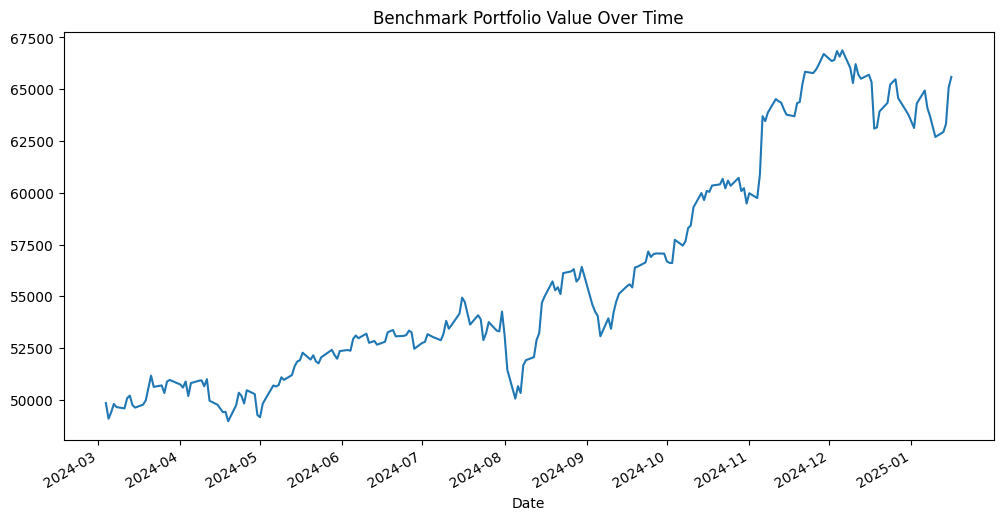

In [638]:
# Final bench mark strategy portfolio value
total_portfolio_value

benchmark_df['Total Benchmark'].plot(title='Benchmark Portfolio Value Over Time', figsize=(12, 6))

<Axes: title={'center': 'Benchmark Strategy Portfolio Value Over Time'}, xlabel='Date'>

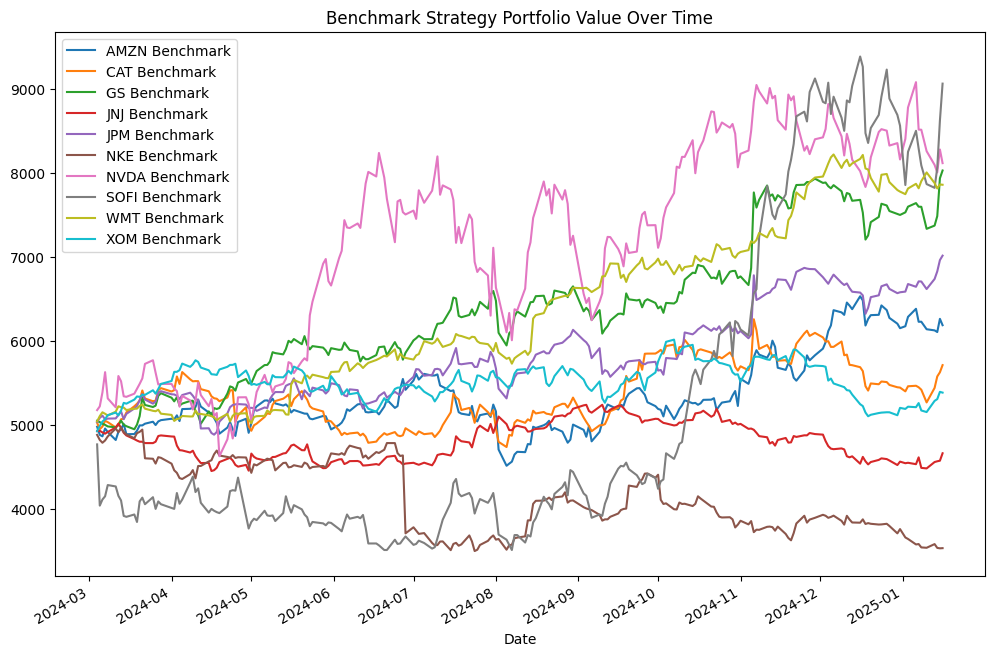

In [639]:
benchmark_df[['AMZN Benchmark', 'CAT Benchmark', 'GS Benchmark', 'JNJ Benchmark', 'JPM Benchmark', 'NKE Benchmark', 'NVDA Benchmark', 'SOFI Benchmark', 'WMT Benchmark','XOM Benchmark']].plot(figsize=(12, 8), title='Benchmark Strategy Portfolio Value Over Time')

# Algorithm

In [640]:
def models_fit(data, cols, models, pred_feature):

    for model in models:
        model.fit(data[cols], data[pred_feature])

    return models

def models_predict(data, cols, models):

    preds = []
    for model in models:
        preds.append(model.predict(data[cols]))

    final_pred = vote_for_signal(preds)

    return final_pred    

def vote_for_signal(preds):

    final_pred = np.mean(preds)

    # make it so that if it is greater than 0, it is 1, if it is 0, make it 0 and if it is less than 0, make it -1
    final_pred = np.where(final_pred > 0, 1, final_pred)
    final_pred = np.where(final_pred < 0, -1, final_pred)
    final_pred = np.where(final_pred == 0, 0, final_pred)

    return final_pred

In [641]:
def get_signal(models, train_df, features, pred_feature):

    models_fit(train_df.iloc[:-2], features, models, pred_feature)

    predict_data = train_df.iloc[[-1]].copy()

    preds = models_predict(predict_data[features], features, models) 

    pred = vote_for_signal(preds)

    return pred
        

In [642]:
def get_investment_amount(signals, wealth, _, weights):

    investment_amount = []
    unused_weatlh = 0
    allocated_wealth = 0
    for i in range(len(signals)):

        weight = weights.get(stock_used[i])

        if signals[i] == 1:
            investment_amount.append(wealth * weight)
            allocated_wealth += wealth * weight

        elif signals[i] == -1:
            investment_amount.append(wealth * weight/2)
            unused_weatlh += wealth * weight/2
            allocated_wealth += wealth * weight/2
        
        elif signals[i] == 0:
            investment_amount.append(0)
            unused_weatlh += wealth * weight

    return (investment_amount, unused_weatlh, allocated_wealth)

In [643]:
def get_investment_amount_no_weights(signals, wealth, tot_num_stocks, _):

    amount_of_short = signals.count(-1)
    amount_of_long = signals.count(1)

    investment_amounts = tot_num_stocks * [max(wealth / (2 * amount_of_short + amount_of_long),0)]

    allocated_wealth = sum(investment_amounts)
    unused_wealth = 0.5 * investment_amounts[0] * amount_of_short


    return investment_amounts, allocated_wealth, unused_wealth

In [653]:
def trade(df_stocks, df_features, weights_dict, wealth = 50000):

    dates = df_features.index

    # find index to date 2024-03-01
    index = dates.get_loc('2024-03-01')

    # calculate the indices amount left
    indices_left = len(dates) - index

    trade_dates = df_features.index[index:]

    # inital split data into training window and testing
    train_df = df_features[3:index]

    strats_df = pd.DataFrame(index = trade_dates, columns = df_stocks['Stock'])
    strats_df = strats_df.fillna(0)

    signal_df = pd.DataFrame(index = trade_dates, columns = df_stocks['Stock'])
    signal_df = signal_df.fillna(0)

    wealths_df = pd.DataFrame(index = trade_dates, columns = ['Wealth','Unused Wealth', 'Allocated Wealth'])
    wealths_df.iloc[0] = [wealth, wealth, 0]

    for i in tqdm(range(1, indices_left)):

        signals = []
        invest_amounts = []
        strats = []

        for j in range(len(df_stocks)):

            # get all stocks ML specifications
            stock = df_stocks['Stock'][j]
            models = df_stocks['Model'][j]
            features = df_stocks['Feature'][j]
            pred_feature = df_stocks['Target'][j]

            stock_train_df = train_df[stock][:index + 1]

            # get the signal for tomorrow for that stock and add it to the list of signals
            signals.append(get_signal(models, stock_train_df, features, pred_feature))


            # computes if the strategy would have made money or not and how much
            strats.append( df_features[stock].Log_ret[index + i] * signals[j] )

            # get the signals and how much to invest in each stock

        # get signals and how much to invest in each stock
        (invest_amounts, unused_wealth, allocated_wealth) = get_investment_amount(signals, wealth, len(df_stocks), weights_dict)

        invest_amounts = np.array(invest_amounts)
        strats = np.array(strats)
        # Compute the wealth difference based on the investment amounts and strategies
        wealth_diff = np.sum(invest_amounts * np.exp(strats) - invest_amounts)

        # Update the wealth after the investment day
        wealth += wealth_diff

        wealths_df['Wealth'].iloc[i] = wealth
        wealths_df['Unused Wealth'].iloc[i] = unused_wealth
        wealths_df['Allocated Wealth'].iloc[i] = allocated_wealth

        strats_df.iloc[i] = strats
        signal_df.iloc[i] = signals

        train_df = df_features[i :index + i]
    
    return (wealth, signal_df, strats_df, wealths_df)

In [659]:
weights = np.linspace(2,1, len(stock_used))
weights = weights / np.sum(weights)

weights_dict = {}
for i in range(len(weights)):
    weights_dict[stock_used[i]] = weights[i].round(3)

wealth = 50000

(wealth, signal_df, strats_df, wealths_df) = trade(stock_df, features_df, weights_dict, wealth) 

100%|██████████| 220/220 [00:06<00:00, 32.46it/s]


The total wealth is:  61496.89024034652


Text(0, 0.5, 'Wealth')

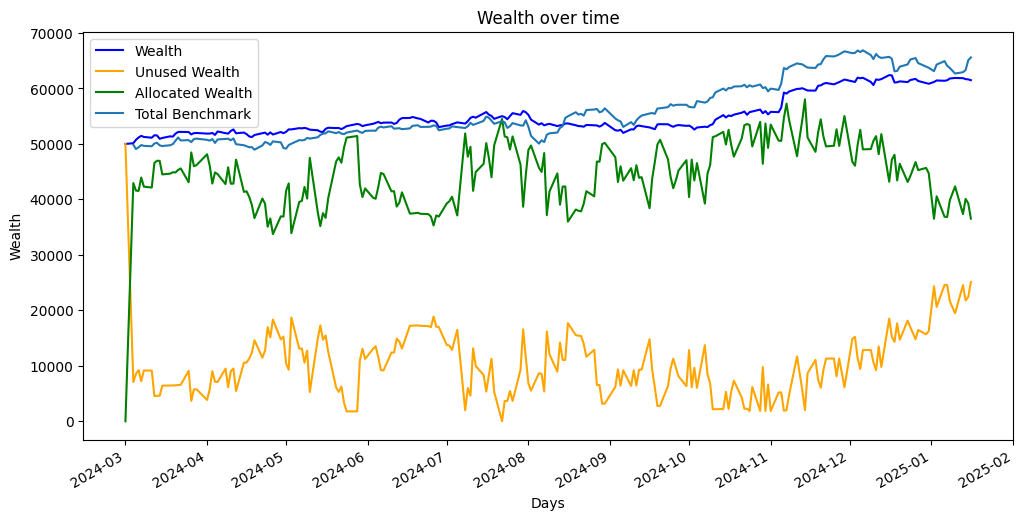

In [660]:
wealth = wealths_df['Wealth'].iloc[-1]
print('The total wealth is: ', wealth)

# Plot the wealth over time
plt.figure(figsize=(12, 6))
#plt.plot(strats_df.cumsum().sum(axis=1).apply(np.exp), label=stock_used, alpha=0.5)
plt.plot(wealths_df['Wealth'], label='Wealth', color='blue')
plt.plot(wealths_df['Unused Wealth'], label='Unused Wealth', color='orange')
plt.plot(wealths_df['Allocated Wealth'], label='Allocated Wealth', color='green')
benchmark_df['Total Benchmark'].plot(title='Benchmark Portfolio Value Over Time', figsize=(12, 6))
plt.legend()
plt.title('Wealth over time')
plt.xlabel('Days')
plt.ylabel('Wealth')

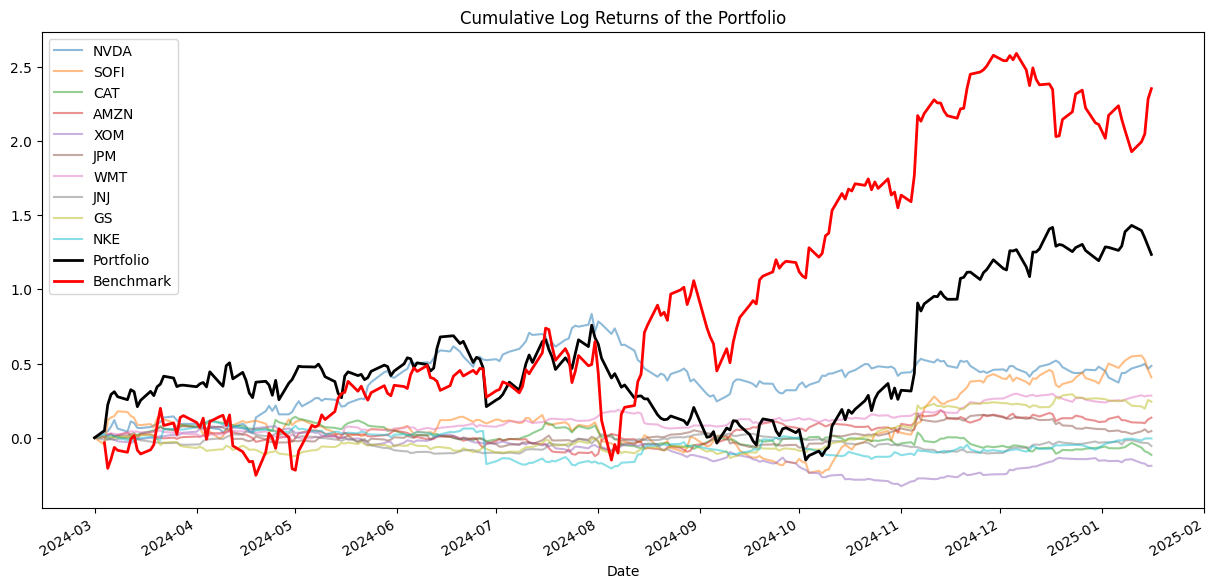

In [661]:
# Plot the cumulative returns of the portfolio
plt.figure(figsize=(15, 7))
plt.plot(strats_df.cumsum(), label=stock_used, alpha=0.5)
plt.plot(strats_df.cumsum().sum(axis=1), label='Portfolio', color='black', linewidth=2)
stock_eod_benchmark[log_return_columns].cumsum().sum(axis=1).plot(label='Benchmark', color='red', linewidth=2)

plt.title('Cumulative Log Returns of the Portfolio')
plt.legend()

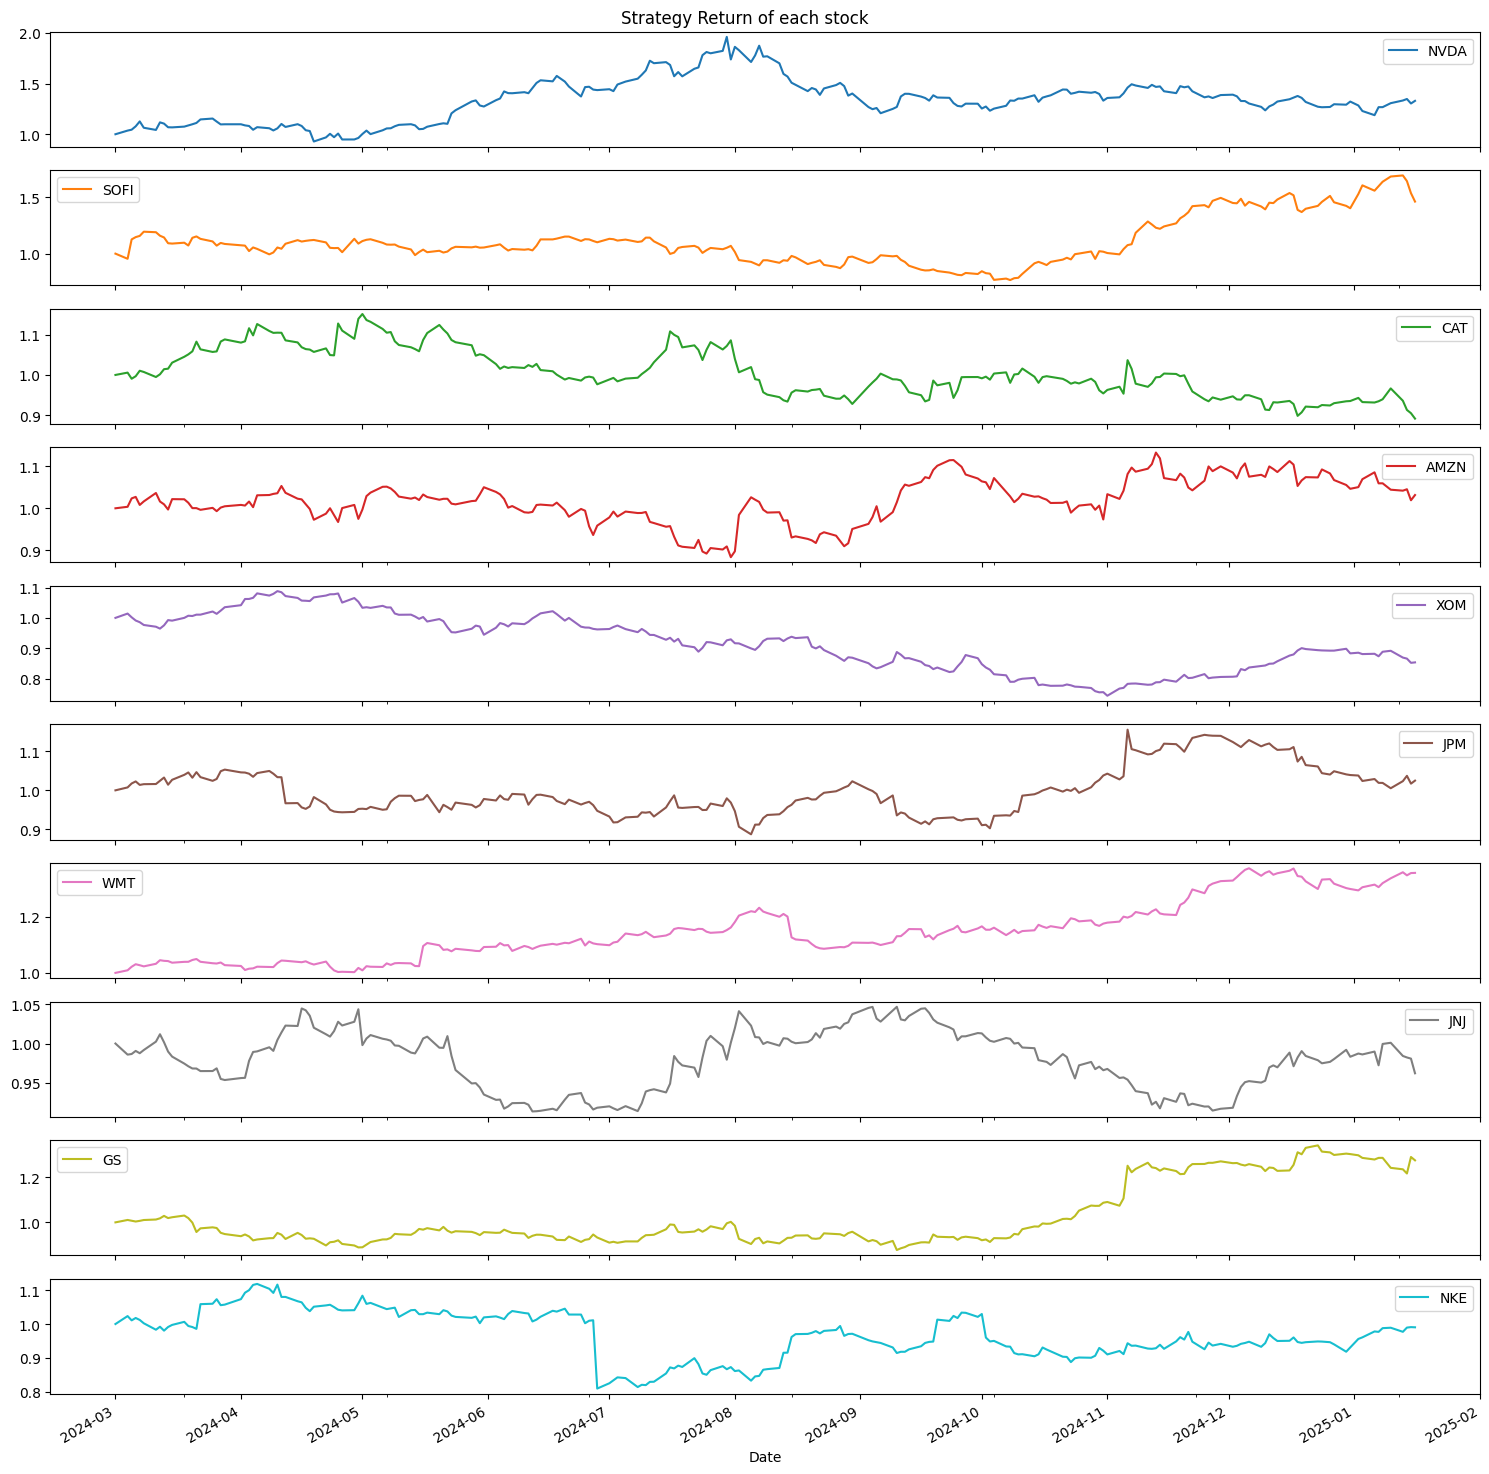

In [657]:
# plot the cumulative returns of each stock
(strats_df.cumsum().apply(np.exp)).plot(subplots=True, figsize=(15, 15), title='Strategy Return of each stock')
plt.tight_layout()

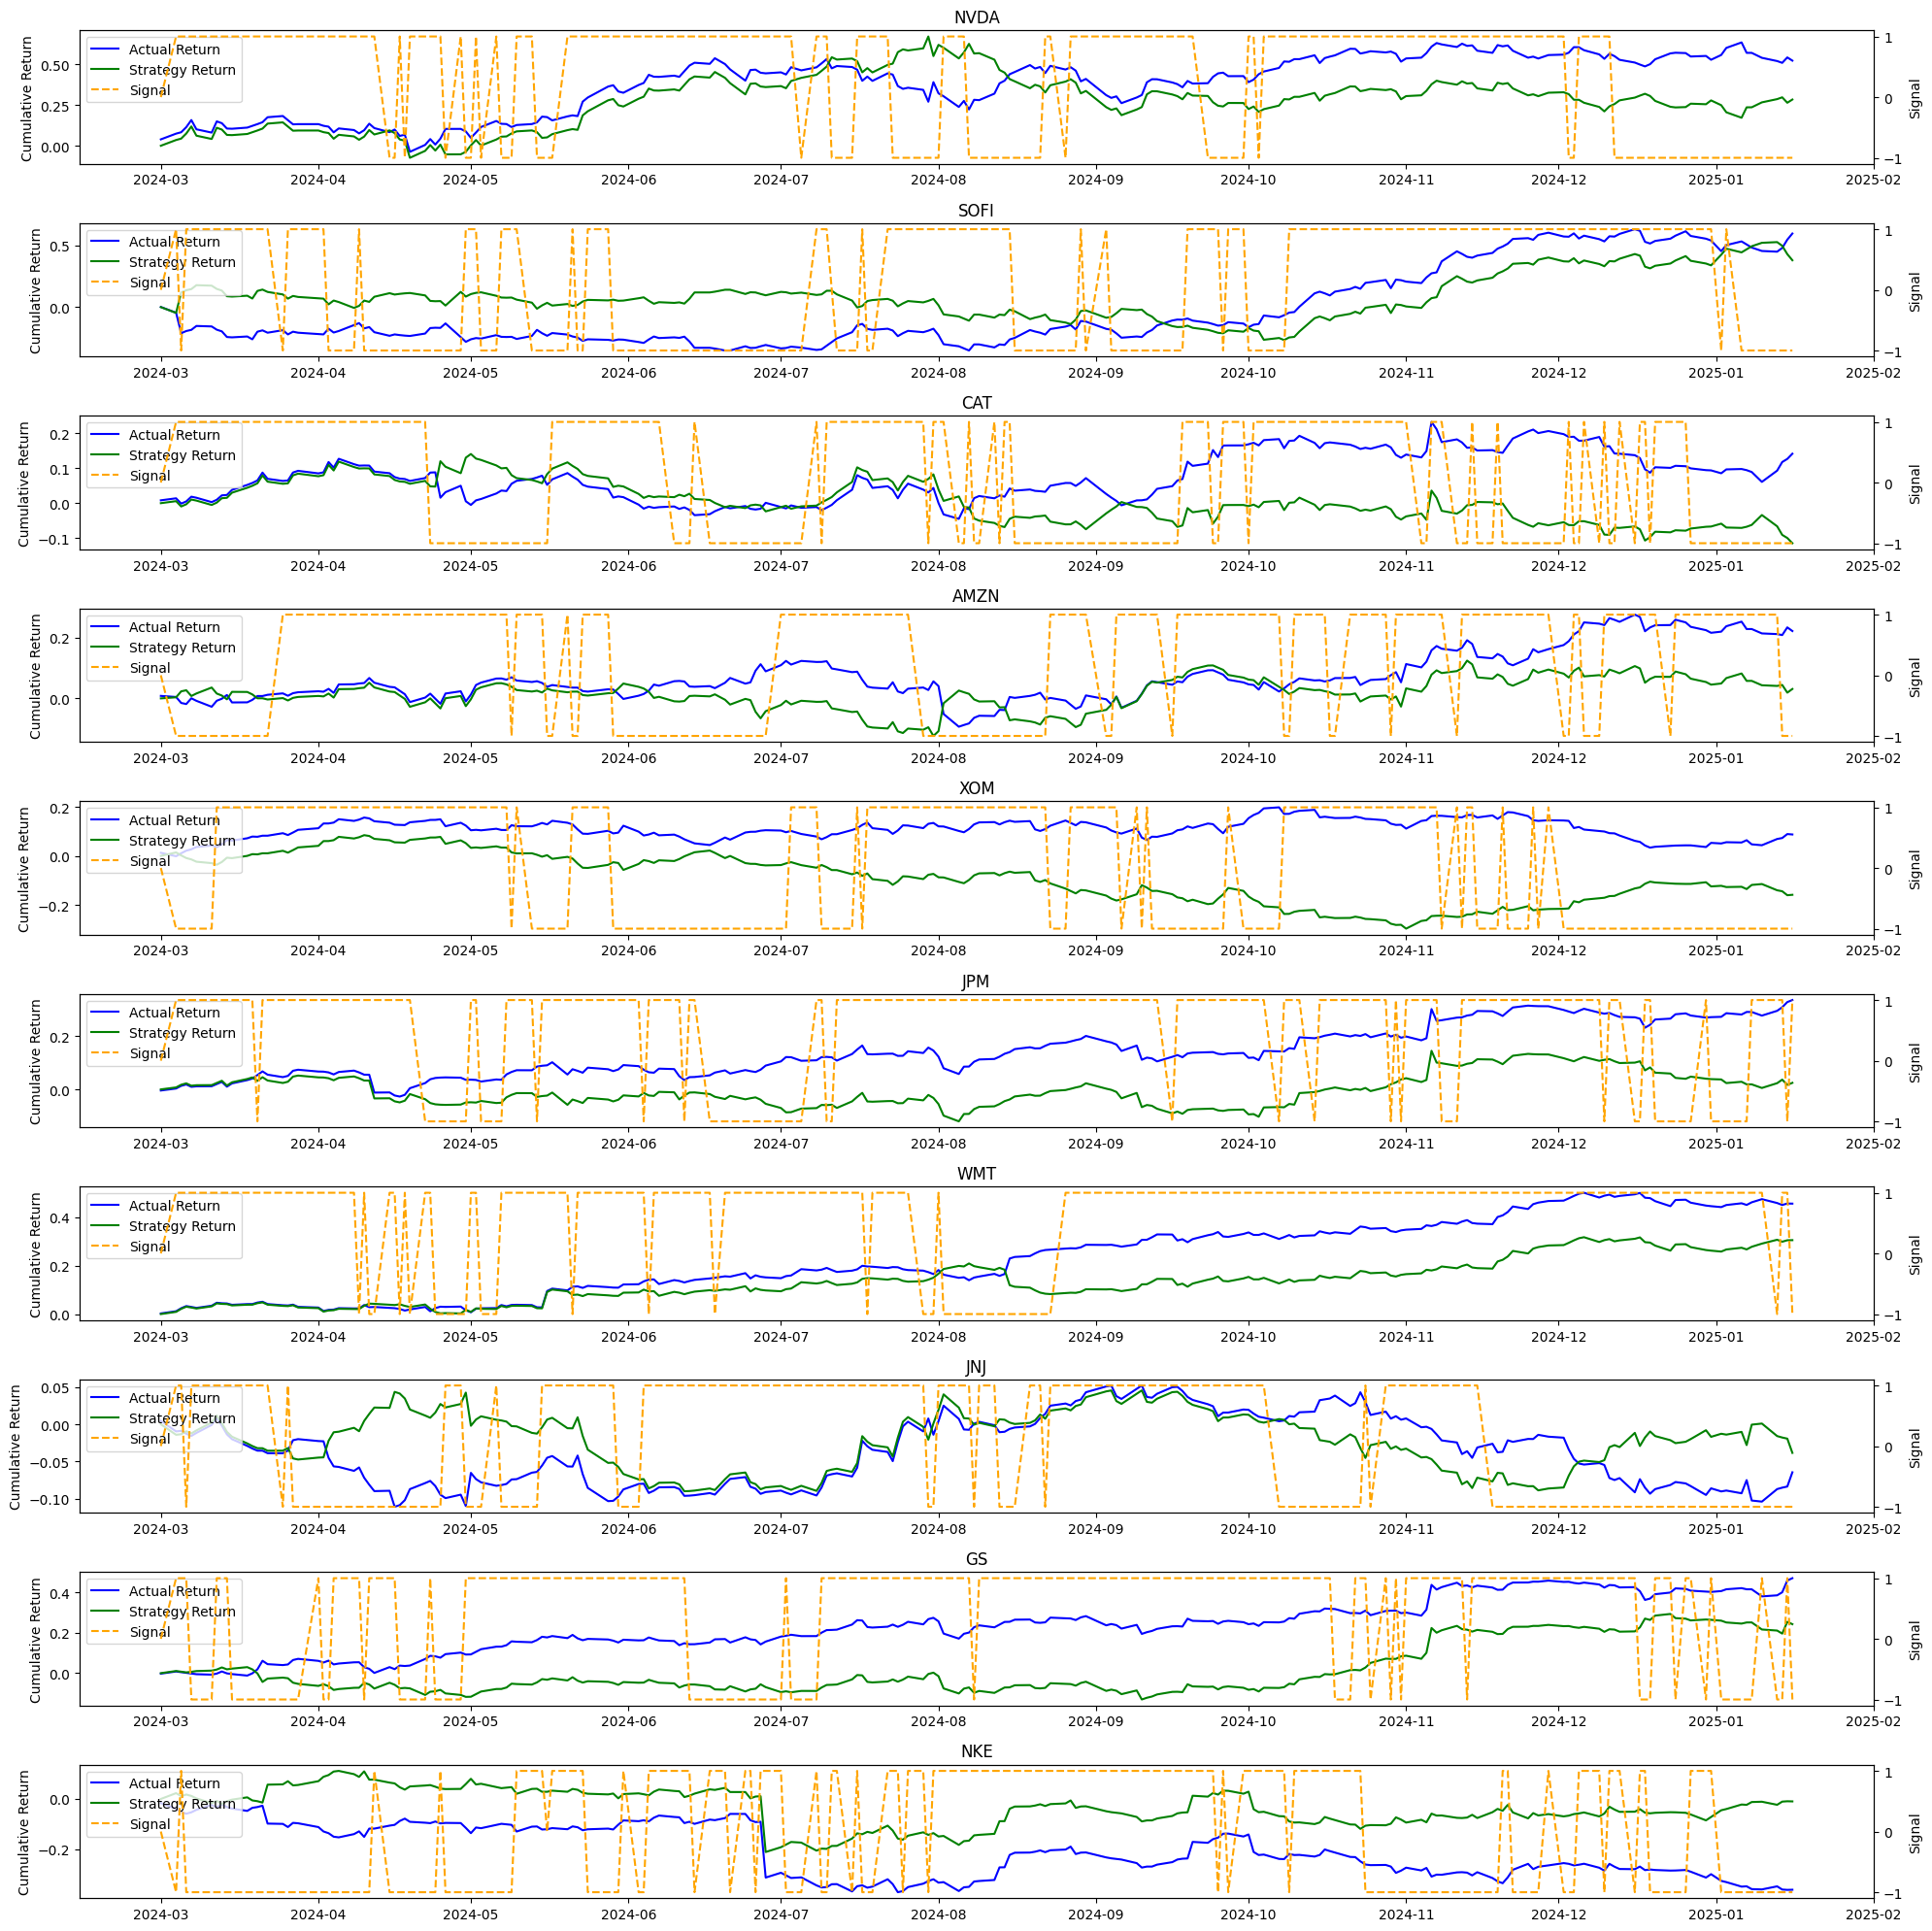

In [658]:
fig, axs = plt.subplots(10, 1, figsize=(20, 20))
axs = axs.flatten()
for i, stock in enumerate(stock_used):
    ax1 = axs[i]
    ax2 = ax1.twinx()  # Create a twin y-axis
    aligned_log_ret = features_df[stock].Log_ret.loc[strats_df.index].cumsum()  # Align with strats_df index
    ax1.plot(aligned_log_ret, label='Actual Return', color='blue')
    ax1.plot(strats_df[stock].cumsum(), label='Strategy Return', color='green')
    ax2.plot(signal_df[stock], label='Signal', color='orange', linestyle='--')
    ax1.set_title(stock)
    ax1.set_ylabel('Cumulative Return')
    ax2.set_ylabel('Signal')
    lines, labels = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines + lines2, labels + labels2, loc='upper left')

plt.tight_layout()